In [58]:
import tensorflow
from tensorflow import keras as ks
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as mpp
import matplotlib.image as mpimg
import pandas as pd
import os

In [16]:
print(tensorflow.__version__)

2.4.1


In [3]:
mnList = ks.datasets.fashion_mnist
(xTrain,yTrain), (xTest, yTest) = mnList.load_data()
xTrain, xTest = xTrain/255, xTest/255

In [4]:
model = ks.models.Sequential([
    ks.layers.Flatten(input_shape = (28,28)),
    ks.layers.Dense(512, activation = tensorflow.nn.relu),
    ks.layers.Dense(10,activation = tensorflow.nn.softmax)
])

In [12]:
model.compile(optimizer=tensorflow.optimizers.Adam(),
loss = 'sparse_categorical_crossentropy',
metrics = ['accuracy']
)

model.fit(xTrain,yTrain, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.5922 - accuracy: 0.7926
Epoch 2/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.3668 - accuracy: 0.8653
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3232 - accuracy: 0.8813
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2976 - accuracy: 0.8901
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2786 - accuracy: 0.8964
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2576 - accuracy: 0.9021
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2510 - accuracy: 0.9055
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2406 - accuracy: 0.9094
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2300 - accuracy: 0.9137
Epoch 10/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.222

## more complicated data

In [29]:
os.listdir("images/train")

['messy', 'clean']

In [28]:
trainDir = "images/train"
trainMessyDir = os.path.join(trainDir, "messy")
trainClaenDir = os.path.join(trainDir, "clean")

In [30]:
os.listdir("images/val")

['messy', 'clean']

In [31]:
valDir = "images/val"
valMessyDir = os.path.join(valDir,"messy")
valCleanDir = os.path.join(valDir,"clean")

In [34]:
trainData = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode='nearest'
)
testData = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode='nearest'
)

In [38]:
trainGen = trainData.flow_from_directory(
    trainDir,
    target_size=(150,150),
    batch_size =4,
    class_mode = 'binary'
)

testGen = testData.flow_from_directory(
    valDir,
    target_size=(150,150),
    batch_size =4,
    class_mode = 'binary'
)

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [41]:
model = ks.models.Sequential([
    ks.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    ks.layers.MaxPooling2D(2, 2),
    ks.layers.Conv2D(64, (3,3), activation='relu'),
    ks.layers.MaxPooling2D(2,2),
    ks.layers.Conv2D(128, (3,3), activation='relu'),
    ks.layers.MaxPooling2D(2,2),
    ks.layers.Conv2D(128, (3,3), activation='relu'),
    ks.layers.MaxPooling2D(2,2),
    ks.layers.Flatten(),
    ks.layers.Dense(512, activation='relu'),
    ks.layers.Dense(1, activation='sigmoid')
])

In [42]:
model.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [45]:
model.fit(
      trainGen,
      steps_per_epoch=25,       # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20,                # tambahkan eposchs jika akurasi model belum optimal
      validation_data=testGen,  # menampilkan akurasi pengujian data validasi
      validation_steps=5,       # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/20
25/25 - 6s - loss: 0.8013 - accuracy: 0.5200 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 2/20
25/25 - 4s - loss: 0.6970 - accuracy: 0.4400 - val_loss: 0.6931 - val_accuracy: 0.6000
Epoch 3/20
25/25 - 5s - loss: 0.6933 - accuracy: 0.4800 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/20
25/25 - 4s - loss: 0.6932 - accuracy: 0.5400 - val_loss: 0.6921 - val_accuracy: 0.5000
Epoch 5/20
25/25 - 5s - loss: 0.6927 - accuracy: 0.5300 - val_loss: 0.6892 - val_accuracy: 0.6000
Epoch 6/20
25/25 - 4s - loss: 0.6778 - accuracy: 0.6600 - val_loss: 0.6008 - val_accuracy: 0.6500
Epoch 7/20
25/25 - 5s - loss: 0.7209 - accuracy: 0.5600 - val_loss: 0.6702 - val_accuracy: 0.8500
Epoch 8/20
25/25 - 5s - loss: 0.6832 - accuracy: 0.5800 - val_loss: 0.6969 - val_accuracy: 0.5000
Epoch 9/20
25/25 - 5s - loss: 0.6916 - accuracy: 0.5100 - val_loss: 0.6874 - val_accuracy: 0.5000
Epoch 10/20
25/25 - 4s - loss: 0.6861 - accuracy: 0.4800 - val_loss: 0.6731 - val_accuracy: 0.5000
Epoch 11/20
25/25 -

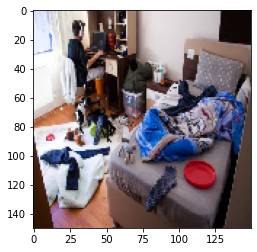

In [68]:
img = ks.preprocessing.image.load_img("mess1.jpg", target_size=(150,150))
mpp.imshow(img)
x = ks.preprocessing.image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

images = np.vstack([x])

In [69]:
jenis = model.predict(images, batch_size=10)

In [70]:
print(jenis)

[[1.]]
